In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
init_printing(use_latex='mathjax')

In [2]:
%matplotlib notebook

First let's look at some analytical properties

In [3]:
# Here are some symbolic variables
etaW = Symbol('eta_W')
sigma2W = Symbol('sigma^2_W')
sigma2G = Symbol('sigma^2_G')
Z2 = Symbol('Z^2')

In [4]:
# Getting the Weibull distribution
rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*exp(-(Z2/sigma2W)**etaW)
print(rhoW)
display(rhoW)

eta_W*(Z^2/sigma^2_W)**(eta_W - 1)*exp(-(Z^2/sigma^2_W)**eta_W)/sigma^2_W


                              η_W
                      ⎛  Z²  ⎞   
            η_W - 1  -⎜──────⎟   
    ⎛  Z²  ⎞          ⎝σ_W__2⎠   
η_W⋅⎜──────⎟       ⋅ℯ            
    ⎝σ_W__2⎠                     
─────────────────────────────────
              σ_W__2             

In [5]:
# Getting the Gaussian pdf in the limit eta=1
rhoG = rhoW.subs(etaW,1)
rhoG = rhoG.subs(sigma2W,sigma2G)
print(rhoG)
display(rhoG)

exp(-Z^2/sigma^2_G)/sigma^2_G


  -Z²  
 ──────
 σ_G__2
ℯ      
───────
 σ_G__2

In [6]:
# Getting the slope of the Gaussian pdf
dlogrhoG_dZ2 = diff(log(rhoG),Z2)
print(dlogrhoG_dZ2)
display(dlogrhoG_dZ2)

-1/sigma^2_G


 -1   
──────
σ_G__2

In [7]:
# Getting the slope of the Weibull pdf
dlogrhoW_dZ2 = diff(log(rhoW),Z2)
print(dlogrhoW_dZ2)
display(dlogrhoW_dZ2)

sigma^2_W*(Z^2/sigma^2_W)**(-eta_W + 1)*(-eta_W**2*(Z^2/sigma^2_W)**eta_W*(Z^2/sigma^2_W)**(eta_W - 1)*exp(-(Z^2/sigma^2_W)**eta_W)/(Z^2*sigma^2_W) + eta_W*(Z^2/sigma^2_W)**(eta_W - 1)*(eta_W - 1)*exp(-(Z^2/sigma^2_W)**eta_W)/(Z^2*sigma^2_W))*exp((Z^2/sigma^2_W)**eta_W)/eta_W


                        ⎛                                             η_W     
                        ⎜                                     ⎛  Z²  ⎞        
                        ⎜               η_W         η_W - 1  -⎜──────⎟        
                        ⎜     2 ⎛  Z²  ⎞    ⎛  Z²  ⎞          ⎝σ_W__2⎠        
               -η_W + 1 ⎜  η_W ⋅⎜──────⎟   ⋅⎜──────⎟       ⋅ℯ               η_
       ⎛  Z²  ⎞         ⎜       ⎝σ_W__2⎠    ⎝σ_W__2⎠                          
σ_W__2⋅⎜──────⎟        ⋅⎜- ────────────────────────────────────────────── + ──
       ⎝σ_W__2⎠         ⎝                    Z²⋅σ_W__2                        
──────────────────────────────────────────────────────────────────────────────
                                                                  η_W         

                                      η_W⎞               
                              ⎛  Z²  ⎞   ⎟               
          η_W - 1            -⎜──────⎟   ⎟  ⎛        η_W⎞
  ⎛  Z²  ⎞                    ⎝σ_W_

In [8]:
# Trying to get the slope of the Weibull pdf in the limit eta -> 1
etaWprime = Symbol('eta_Wprime')
dlogrhoW_dZ2_etaprime = dlogrhoW_dZ2.subs(etaW,1-etaWprime)
display(dlogrhoW_dZ2_etaprime)
dlogrhoW_dZ2_etaprime_taylor = series(dlogrhoW_dZ2_etaprime,etaWprime,n=3)
print(dlogrhoW_dZ2_etaprime_taylor)
display(dlogrhoW_dZ2_etaprime_taylor)

                    ⎛                                           -η_W′ + 1     
                    ⎜                                   ⎛  Z²  ⎞              
                    ⎜               -η_W′              -⎜──────⎟              
                    ⎜       ⎛  Z²  ⎞                    ⎝σ_W__2⎠            ⎛ 
               η_W′ ⎜  η_W′⋅⎜──────⎟     ⋅(-η_W′ + 1)⋅ℯ                     ⎜─
       ⎛  Z²  ⎞     ⎜       ⎝σ_W__2⎠                                        ⎝σ
σ_W__2⋅⎜──────⎟    ⋅⎜- ────────────────────────────────────────────────── - ──
       ⎝σ_W__2⎠     ⎝                      Z²⋅σ_W__2                          
──────────────────────────────────────────────────────────────────────────────
                                                                            -η

                                                     -η_W′ + 1⎞               
                                             ⎛  Z²  ⎞         ⎟               
      -η_W′         -η_W′ + 1               -⎜─────

-1/sigma^2_W + eta_Wprime*(log(Z^2/sigma^2_W)/sigma^2_W + 1/sigma^2_W - 1/Z^2) + eta_Wprime**2*(-log(Z^2/sigma^2_W)**2/(2*sigma^2_W) - log(Z^2/sigma^2_W)/sigma^2_W) + O(eta_Wprime**3)


                ⎛   ⎛  Z²  ⎞              ⎞         ⎛     2⎛  Z²  ⎞      ⎛  Z²
                ⎜log⎜──────⎟              ⎟         ⎜  log ⎜──────⎟   log⎜────
    1           ⎜   ⎝σ_W__2⎠     1      1 ⎟       2 ⎜      ⎝σ_W__2⎠      ⎝σ_W_
- ────── + η_W′⋅⎜─────────── + ────── - ──⎟ + η_W′ ⋅⎜- ──────────── - ────────
  σ_W__2        ⎝   σ_W__2     σ_W__2   Z²⎠         ⎝    2⋅σ_W__2        σ_W__

  ⎞⎞           
──⎟⎟           
_2⎠⎟    ⎛    3⎞
───⎟ + O⎝η_W′ ⎠
2  ⎠           

Now for some numerical work

<IPython.core.display.Javascript object>


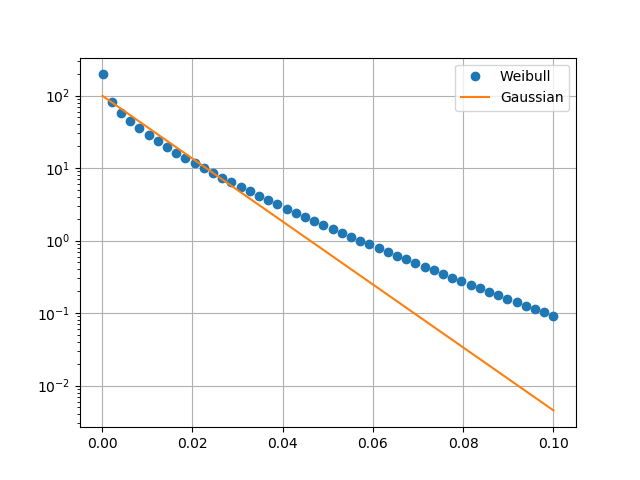

In [9]:
sigmaW_num = 0.1
sigma2W_num = sigmaW_num**2
etaW_num = 0.8
etaWprime_num = 1-etaW_num
Z2max_num = .1
Z2_num = np.linspace(0.0001,Z2max_num)

# Set up the graph
plt.figure()

# This is the exact result, Weibull
rhoW_num = etaW_num*(Z2_num/sigma2W_num)**(etaW_num - 1)*np.exp(-(Z2_num/sigma2W_num)**etaW_num)/(sigma2W_num)
yW = np.log(rhoW_num)
plt.semilogy(Z2_num,np.exp(yW),'o',label='Weibull')

# This is the exact result, Gaussian
rhoG_num = np.exp(-(Z2_num/sigma2W_num))/sigma2W_num
yG = np.log(rhoG_num)
plt.semilogy(Z2_num,np.exp(yG),label='Gaussian')

# Legend
plt.legend()
plt.grid(True)

In [10]:
# # This is an affine approximation of the slope
# slope_approx = -1/sigma2W_num + etaWprime_num*(np.log(Z2max_num/sigma2W_num)/sigma2W_num + 1/sigma2W_num - 1/Z2max_num)
# print('Approximate sigma = ', np.sqrt(-1/slope_approx))
# slope_numerical = (yW[-1]-yW[-2])/(Z2_num[-1]-Z2_num[-2])
# print('Actual sigma =', np.sqrt(-1/slope_numerical))

In [ ]:
# Testing normalization
